In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import HuberRegressor, LinearRegression

/home/reag2/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.
/home/reag2/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.
/home/reag2/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.
/home/reag2/miniconda3/lib/python3.6/sit

(1,) (1,)
(2,) (2,) (2,)
(1,) (1,)
(2,) (2,) (2,)
(1,) (1,)
(2,) (2,) (2,)
(1,) (1,)
(2,) (2,) (2,)
(1,) (1,)
(2,) (2,) (2,)
(1,) (1,)
(2,) (2,) (2,)
(1,) (1,)
(2,) (2,) (2,)


No handles with labels found to put in legend.
/home/reag2/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.
/home/reag2/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.
/home/reag2/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in l

(1,) (1,)
(2,) (2,) (2,)
(1,) (1,)
(2,) (2,) (2,)
(1,) (1,)
(2,) (2,) (2,)
(1,) (1,)
(2,) (2,) (2,)
(1,) (1,)
(2,) (2,) (2,)
(1,) (1,)
(2,) (2,) (2,)
(1,) (1,)
(2,) (2,) (2,)


No handles with labels found to put in legend.
/home/reag2/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.
/home/reag2/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


(1,) (1,)
(2,) (2,) (2,)
(1,) (1,)
(2,) (2,) (2,)


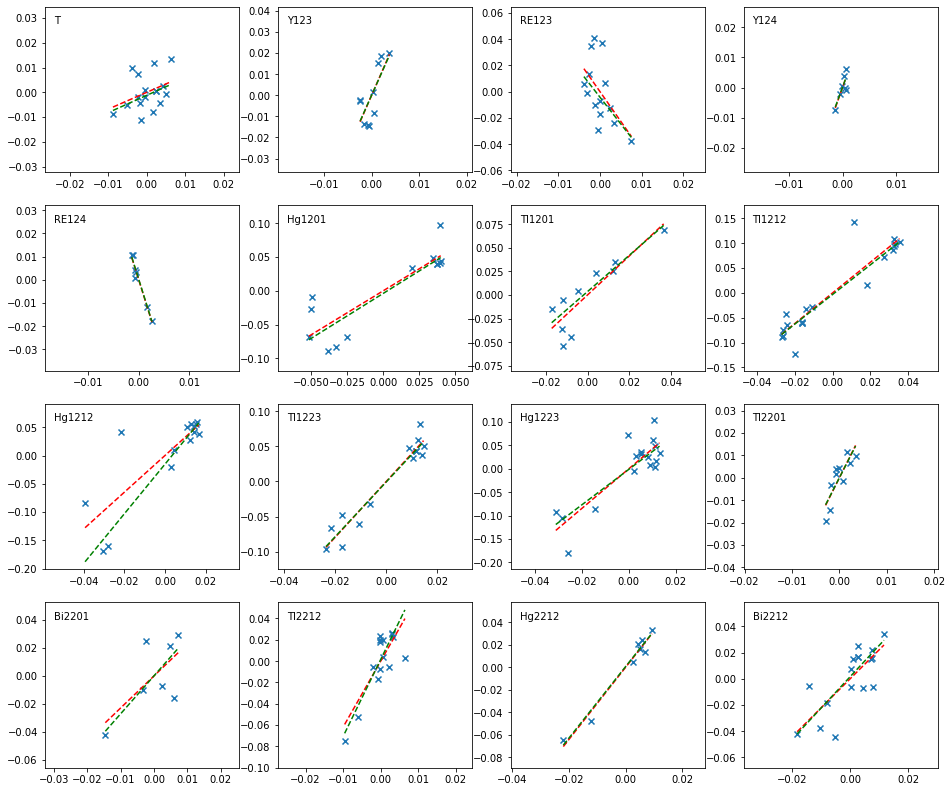

0.670835987323595 0.6988141972854294 0.19561521940295978 0.572480789026272


In [2]:
super_ = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/super_cleaned.csv")
icsd = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/icsd_cleaned.csv")

families = icsd["str3 :"].unique()

r2_vals = []
number = []

fig, ax = plt.subplots(4,4, figsize = (16,14))

reg = LinearRegression()
huber = HuberRegressor()

for n, fam in enumerate(families):
    i, j = divmod(n, 4)
    
    idx = (icsd["str3 :"] == fam)

    api = icsd.loc[idx,["cu-o_a :"]].values.ravel()
    c = icsd.loc[idx,["latc :"]].values.ravel()
    index = icsd.loc[idx, ["id :"]].values.ravel()
    
    if len(api) < 5:
        print("{} not enough data".format(fam))
        continue

    api = api/np.mean(api) - 1
    c = c/np.mean(c) - 1
    
    reg.fit(c.reshape(-1, 1), api.reshape(-1, 1))
    slope = reg.coef_.ravel()
    intercept = reg.intercept_
    
    huber.fit(c.reshape(-1, 1), api.reshape(-1, 1))
    h_slope = huber.coef_
    h_intercept = huber.intercept_
    
    sort = c.argsort().ravel()
    
    api = api[sort]
    c = c[sort]
    index = index[sort]
    
    ends = np.array((c[0],c[-1]))
    lin = ends*slope + intercept
    h_lin = ends*h_slope + h_intercept
    
    ax[i,j].scatter(c,api, marker='x')
    # print(idx)
#     for idx, txt in enumerate(index):
#         ax[i,j].annotate(txt, (c[idx], api[idx]))
    ax[i,j].plot(ends,lin, 'r--')
    ax[i,j].plot(ends,h_lin, 'g--')
#     plt.xlabel('latc standard score')
#     plt.ylabel('apical standard score')
#     ax[i,j].legend(title="{}\nSlope: {:.2f}\nR2: {:.2f}\nh_R2: {:.2f}".format(fam, slope, r_value**2,
#                                             huber.score(c.reshape(-1, 1),api.reshape(-1, 1))))
    ax[i,j].legend(title="{}".format(fam), frameon=False, loc=2)
    

    r2_vals.append(reg.score(c.reshape(-1, 1),api.reshape(-1, 1)))
    number.append(len(c))


plt.show()
print(np.mean(r2_vals), np.median(r2_vals), 
      np.percentile(r2_vals, 75) - np.percentile(r2_vals, 25), 
      np.percentile(r2_vals, 90) - np.percentile(r2_vals, 10))

/home/reag2/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Huber 0.453 0.533
Linear 0.483 0.525


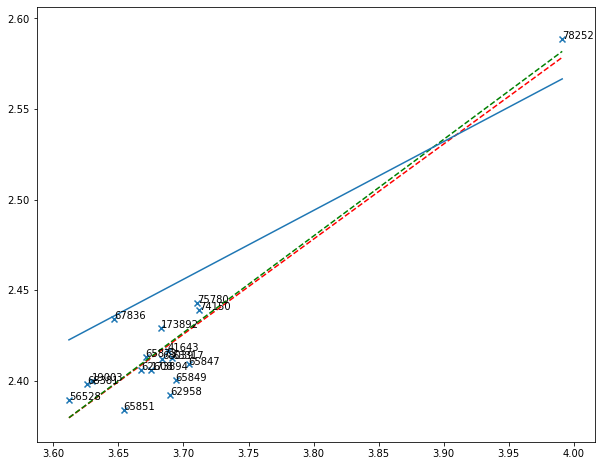

In [17]:
icsd_all = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/icsd_block_all.csv",
                      comment='#')
dft = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/dft_block.csv")

reg = LinearRegression()
huber = HuberRegressor()

api = icsd_all["apical"].values.ravel()
block = icsd_all["La"].values.ravel()
index = icsd_all["col"].values.ravel()

# api = api/np.mean(api) - 1
# block = block/np.mean(block) - 1

reg.fit(block.reshape(-1, 1), api.reshape(-1, 1))

slope = reg.coef_.ravel()
intercept = reg.intercept_

# slope, intercept, r_value, p_value, std_err = stats.linregress(block,api)
huber.fit(block.reshape(-1, 1), api.reshape(-1, 1))

sort = block.argsort().ravel()

api = api[sort]
block = block[sort]
index = index[sort]

lin = np.array((block[0],block[-1]))*slope + intercept
h_lin = np.array((block[0],block[-1]))*huber.coef_ + huber.intercept_

print("Huber {:.3f} {:.3f}".format(huber.intercept_,huber.coef_[0]))
print("Linear {:.3f} {:.3f}".format(intercept[0],slope[0]))

plt.figure(figsize=(10,8))
plt.scatter(block,api, marker='x')
# plt.scatter(icsd["La"],icsd["apical"], marker='o', alpha=0.4)
for idx, txt in enumerate(index):
    plt.annotate(txt, (block[idx], api[idx]))
plt.plot((block[0],block[-1]),lin, 'r--')
plt.plot((block[0],block[-1]),h_lin, 'g--')

plt.plot((block[0],block[-1]),(0.38*block[0]+1.05,0.38*block[-1]+1.05))


plt.show()
